In [1]:
import pickle
import pandas as pd
# import tensorflow as tf
# from tensorflow import keras
import comet_ml
from comet_ml import API
from comet_ml.integration.sklearn import load_model
from utils.model_utils import *
from utils.plot_utils import *


def get_test_data_baseline_models():
    df_reg_season = pd.read_csv("baseline_model_test_data_reg_season.csv")  # regular season data
    df_playoff = pd.read_csv("baseline_model_test_data_playoffs.csv")  # playoffs data
    df_reg_season = df_reg_season.dropna()
    df_reg_season = df_reg_season.drop_duplicates()
    df_playoff = df_playoff.dropna()
    df_playoff = df_playoff.drop_duplicates()
    return df_reg_season, df_playoff


def get_test_data_advanced_models():
    df_reg_season = pd.read_csv("advanced_models_test_data_reg_season.csv")  # regular season data
    df_playoff = pd.read_csv("advanced_models_test_data_playoffs.csv")  # playoffs data
    return df_reg_season, df_playoff


def download_model(api_key, workspace_name, model_name, version):
    api = API(api_key=f"{api_key}")

    # Download a Registry Model:
    api.download_registry_model(f"{workspace_name}", f"{model_name}", f"{version}",
                                output_path="comet_models/", expand=True)

In [6]:
def predict_logreg(df):
    df = df.copy()
    # df = df.drop_duplicates()
    # df = df.dropna()
    # TODO: complete this function to test the baseline models
    # X_test = df[['DistanceToGoal']]
    # X_test = df[['ShootingAngle']]
    X_test = df[['DistanceToGoal', 'ShootingAngle']]
    y_test = df['isGoal']
    # onehot_E = pd.get_dummies(X_test['ShotType'], prefix='ShotType')
    # X_test = X_test.drop('ShotType', axis=1)
    # X_test = pd.concat([X_test, onehot_E], axis=1)
    # weight = len(y_test[y_test == 1])/len(y_test)

    # Load the model from Comet Registry
    # TODO: this doesn't work
    # lr_model = load_model("registry://nhl-analytics-milestone-2/logistic_regression_distance_to_goal:1.0.0")
    # lr_model = pickle.load(open("models/logistic_regression_distance_to_goal.pkl", 'rb'))
    # lr_model = pickle.load(open("models/logistic_regression_shooting_angle.pkl", 'rb'))
    lr_model = pickle.load(open("models/logistic_regressiondistance_to_goal_shooting_angle.pkl", 'rb'))
    

    prediction = lr_model.predict(X_test)
    return prediction, y_test

In [11]:
df_rs_bm, df_playoffs_bm = get_test_data_baseline_models()
df_rs_am, df_playoffs_am = get_test_data_advanced_models()
df_rs_bm = df_rs_bm.copy()
df_rs_bm = df_rs_bm.drop_duplicates()
# TODO: complete this function to test the baseline models
X_test = df_rs_bm[['DistanceToGoal']]
# X_test
df_rs_bm

,Unnamed: 0,isEmptyNet,isGoal,DistanceToGoal,ShootingAngle
0,2,0,1,4.0,-76.0
1,9,0,0,57.0,88.0
2,14,0,0,27.0,-77.0
3,17,0,0,36.0,56.0
4,21,0,0,55.0,58.0
...,...,...,...,...,...
68020,276479,0,0,26.0,-28.0
68021,276481,0,0,40.0,-19.0
68022,276482,0,0,14.0,-45.0
68023,276488,0,0,11.0,-49.0


In [3]:
api_key = "cX0b8GkNwZ3M1Bzj4d2oeqFmd"  # insert your API key
workspace_name = "nhl-analytics-milestone-2"

# get test data for baseline models
df_rs_bm, df_playoffs_bm = get_test_data_baseline_models()

# get test data for advanced models
df_rs_am, df_playoffs_am = get_test_data_advanced_models()


# to have all the predictions in one figure (1 for regular season and 1 for playoffs)
all_predictions_rs = []
all_y_true_rs = []
all_predictions_pl = []
all_y_true_pl = []



# BASELINE MODELS
###############################################################

# download logistic regression models programmatically using the Python API
# TODO: specify name and version
# download_model(api_key, workspace_name, model_name="logistic_regression_distance_to_goal", version="1.0.0")

# test baseline models:
# TODO: insert here code to call the function to run the baseline models
prediction_lr_distance_rs, y_true_lr_distance_rs = predict_logreg(df_rs_bm)  # regular season
prediction_lr_distance_pl, y_true_lr_distance_pl = predict_logreg(df_playoffs_bm)  # playoffs

# add prediction and y_true to the lists
# TODO
all_predictions_rs.append(prediction_lr_distance_rs)
all_predictions_pl.append(prediction_lr_distance_pl)
all_y_true_rs.append(y_true_lr_distance_rs)
all_y_true_pl.append(y_true_lr_distance_pl)

/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/skl

In [5]:
download_model(api_key, workspace_name, model_name="logistic_regression_shooting_angle", version="1.0.0")

# test baseline models:
# TODO: insert here code to call the function to run the baseline models
prediction_lr_distance_rs, y_true_lr_distance_rs = predict_logreg(df_rs_bm)  # regular season
prediction_lr_distance_pl, y_true_lr_distance_pl = predict_logreg(df_playoffs_bm)  # playoffs

# add prediction and y_true to the lists
# TODO
all_predictions_rs.append(prediction_lr_distance_rs)
all_predictions_pl.append(prediction_lr_distance_pl)
all_y_true_rs.append(y_true_lr_distance_rs)
all_y_true_pl.append(y_true_lr_distance_pl)

COMET INFO: Downloading registry model 'logistic_regression_shooting_angle', version '1.0.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/home/cheng-ubuntu/Documents/ift6758/project/comet_models' ...
COMET INFO: done!
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is

In [9]:
df_rs_bm

,Unnamed: 0,isEmptyNet,isGoal,DistanceToGoal,ShootingAngle
0,2,0,1,4.0,-76.0
1,9,0,0,57.0,88.0
2,14,0,0,27.0,-77.0
3,17,0,0,36.0,56.0
4,21,0,0,55.0,58.0
...,...,...,...,...,...
68020,276479,0,0,26.0,-28.0
68021,276481,0,0,40.0,-19.0
68022,276482,0,0,14.0,-45.0
68023,276488,0,0,11.0,-49.0


In [7]:
download_model(api_key, workspace_name, model_name="logistic_regressiondistance_to_goal_shooting_angle", version="1.0.0")

# test baseline models:
# TODO: insert here code to call the function to run the baseline models
prediction_lr_distance_rs, y_true_lr_distance_rs = predict_logreg(df_rs_bm)  # regular season
prediction_lr_distance_pl, y_true_lr_distance_pl = predict_logreg(df_playoffs_bm)  # playoffs

# add prediction and y_true to the lists
# TODO
all_predictions_rs.append(prediction_lr_distance_rs)
all_predictions_pl.append(prediction_lr_distance_pl)
all_y_true_rs.append(y_true_lr_distance_rs)
all_y_true_pl.append(y_true_lr_distance_pl)

COMET INFO: Downloading registry model 'logistic_regressiondistance_to_goal_shooting_angle', version '1.0.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/home/cheng-ubuntu/Documents/ift6758/project/comet_models' ...
COMET INFO: done!
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:767: F

In [8]:
all_predictions_rs, all_predictions_pl

([array([1., 0., 1., ..., 1., 1., 1.]),
  array([0., 1., 0., ..., 0., 0., 0.]),
  array([1., 0., 1., ..., 1., 1., 1.])],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([1., 0., 0., ..., 1., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.])])

In [9]:
sum(all_predictions_rs[2] != all_predictions_rs[1])

33988

In [5]:
lr_model = pickle.load(open("models/logistic_regression_distance_to_goal.pkl", 'rb'))
lr_model

LogisticRegression(random_state=42)

In [10]:
all_y_true_rs

[0        1
 1        0
 2        0
 3        0
 4        0
         ..
 68020    0
 68021    0
 68022    0
 68023    0
 68024    0
 Name: isGoal, Length: 65324, dtype: int64,
 0        1
 1        0
 2        0
 3        0
 4        0
         ..
 68020    0
 68021    0
 68022    0
 68023    0
 68024    0
 Name: isGoal, Length: 65324, dtype: int64,
 0        1
 1        0
 2        0
 3        0
 4        0
         ..
 68020    0
 68021    0
 68022    0
 68023    0
 68024    0
 Name: isGoal, Length: 65324, dtype: int64]

/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

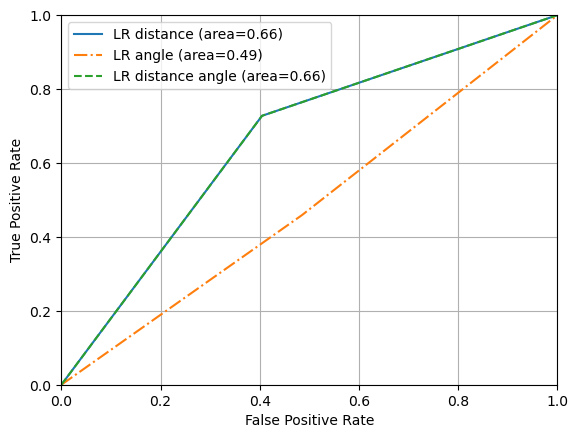

In [11]:

linestyles = ['-', '-.', '--']
labels = ['LR distance', 'LR angle', 'LR distance angle']
# y_val = [y_val for i in range(4)]
plot_roc_curve(all_predictions_rs, all_y_true_rs, linestyles, labels)
# print(pred_proba)

In [19]:
all_predictions_rs, all_y_true_rs

([array([1, 0, 1, ..., 1, 1, 1]),
  array([0, 1, 0, ..., 0, 0, 0]),
  array([1, 0, 1, ..., 1, 1, 1])],
 [0        1
  1        0
  2        0
  3        0
  4        0
          ..
  68020    0
  68021    0
  68022    0
  68023    0
  68024    0
  Name: isGoal, Length: 65324, dtype: int64,
  0        1
  1        0
  2        0
  3        0
  4        0
          ..
  68020    0
  68021    0
  68022    0
  68023    0
  68024    0
  Name: isGoal, Length: 65324, dtype: int64,
  0        1
  1        0
  2        0
  3        0
  4        0
          ..
  68020    0
  68021    0
  68022    0
  68023    0
  68024    0
  Name: isGoal, Length: 65324, dtype: int64])

In [23]:
len(all_predictions_rs[2])

65324

    isGoal percentile_bin
0        1  (-0.001, 1.0]
1        0  (-0.001, 1.0]
2        0  (-0.001, 1.0]
3        0  (-0.001, 1.0]
4        0  (-0.001, 1.0]
5        0  (-0.001, 1.0]
6        0  (-0.001, 1.0]
7        0  (-0.001, 1.0]
8        0  (-0.001, 1.0]
9        0  (-0.001, 1.0]
10       0  (-0.001, 1.0]
11       0  (-0.001, 1.0]
12       0  (-0.001, 1.0]
13       0  (-0.001, 1.0]
14       0  (-0.001, 1.0]
15       0  (-0.001, 1.0]
16       0  (-0.001, 1.0]
17       0  (-0.001, 1.0]
18       0  (-0.001, 1.0]
19       0  (-0.001, 1.0]


/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(lambda f: f['isGoal'].sum()/len(f))
/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(lambda f: f['isGoal'].sum()/len(f))
/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

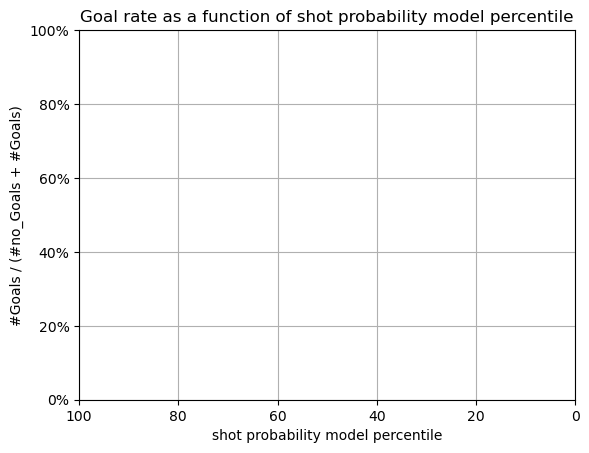

In [12]:
percentile, percentile_pred, y_valid_df = shot_prob_model_percentile(all_predictions_rs[2], all_y_true_rs[2])
print(y_valid_df.head(20))

plot_goal_rate(all_predictions_rs, all_y_true_rs, labels)

/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(lambda f: f['isGoal'].sum()/number_goal_sum)
/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(lambda f: f['isGoal'].sum()/number_goal_sum)
/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to Tr

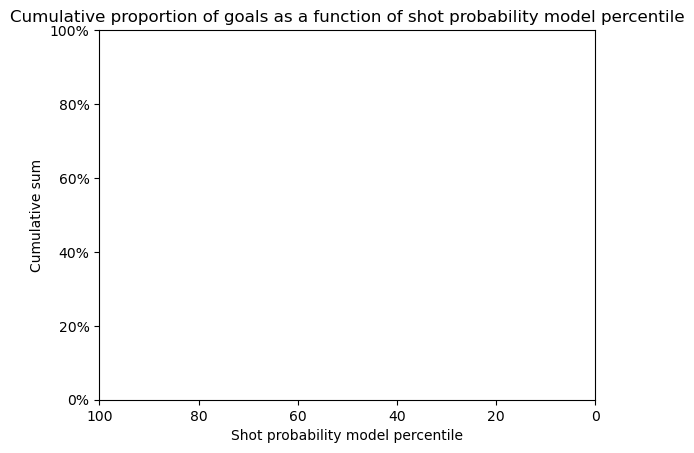

In [13]:
plot_cumulative_sum(all_predictions_rs, all_y_true_rs, labels)

/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

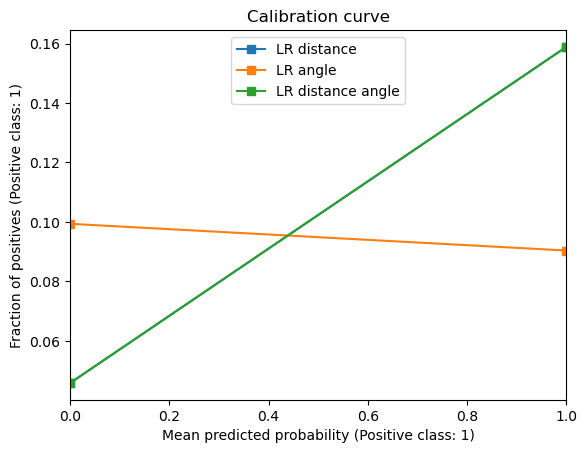

In [14]:
plot_calibration(all_predictions_rs, all_y_true_rs, labels)

In [37]:
def predict_neural_network(df):
    df = df.copy()
    df = df.drop_duplicates()
    df = df.dropna()
    # preprocess the test data in the same way as the training data
    X_test, y_test = preprocess_neural_network_rfc(df)

    # Make predictions
    model = tf.keras.models.load_model("comet_models/neural_network_rfc.keras")
    prediction = model.predict(X_test)

    return prediction, y_test


download_model(api_key, workspace_name, model_name="first-neural-network", version="1.4.0")

# test the neural network:
prediction_nn_rs, y_true_nn_rs = predict_neural_network(df_rs_am)  # regular season
prediction_nn_pl, y_true_nn_pl = predict_neural_network(df_playoffs_am)  # playoffs

# add prediction and y_true to the lists
all_predictions_rs.append(prediction_nn_rs)
all_predictions_pl.append(prediction_nn_pl)
all_y_true_rs.append(y_true_nn_rs)
all_y_true_pl.append(y_true_nn_pl)



COMET INFO: Downloading registry model 'first-neural-network', version '1.4.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/home/cheng-ubuntu/Documents/ift6758/project/comet_models' ...
COMET INFO: done!


   1/2042 [..............................] - ETA: 40s

/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

146/146 [==============================] - 0s 297us/step


/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

In [38]:
all_predictions_rs

[array([1, 0, 1, ..., 1, 1, 1]),
 array([0.993421  , 0.23428918, 0.20379387, ..., 0.00479213, 0.01592009,
        0.0421145 ], dtype=float32),
 array([[0.993421  ],
        [0.23428918],
        [0.20379387],
        ...,
        [0.00479213],
        [0.01592009],
        [0.0421145 ]], dtype=float32)]

In [6]:
# !pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.0 MB/s eta 0:00:005.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import tensorflow as tf

2023-11-12 21:24:14.816371: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-12 21:24:14.818059: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 21:24:14.835577: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 21:24:14.835595: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 21:24:14.835609: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [39]:
all_predictions_rs[2] = all_predictions_rs[2].flatten()
len(all_predictions_rs[2]),len(all_y_true_rs[1])

(65315, 65315)

/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(lambda f: f['isGoal'].sum()/len(f))
/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(lambda f: f['isGoal'].sum()/len(f))
/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

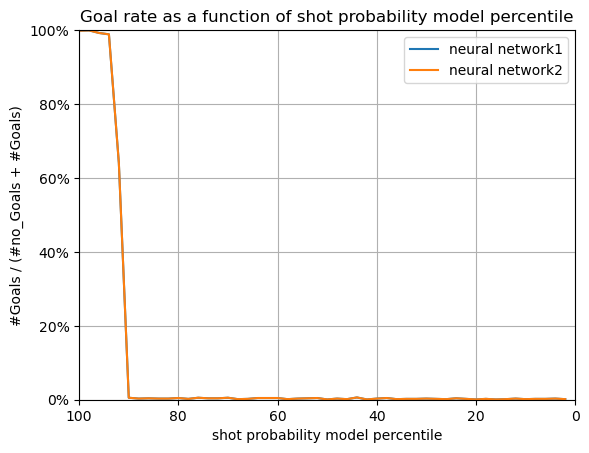

In [44]:
percentile, percentile_pred, y_valid_df = shot_prob_model_percentile(all_predictions_rs[2], all_y_true_rs[2])
# print(y_valid_df.head(20))

plot_goal_rate(all_predictions_rs, all_y_true_rs*3, labels)

/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(lambda f: f['isGoal'].sum()/number_goal_sum)
/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(lambda f: f['isGoal'].sum()/number_goal_sum)
/home/cheng-ubuntu/Documents/ift6758/project/utils/plot_utils.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to Tr

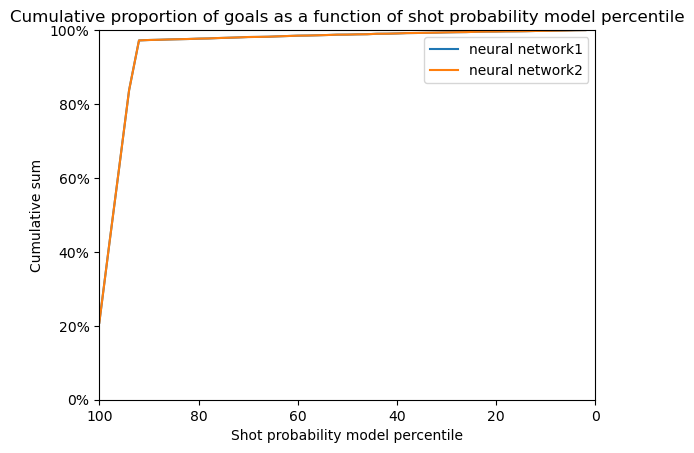

In [45]:
plot_cumulative_sum(all_predictions_rs, all_y_true_rs*3, labels)

/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


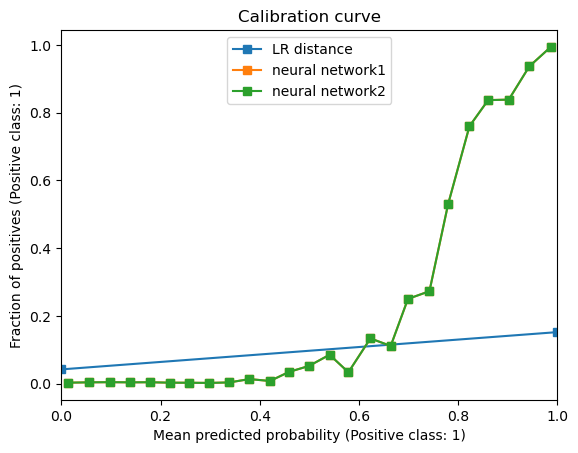

In [47]:
plot_calibration(all_predictions_rs, all_y_true_rs*3, labels)

In [15]:
def predict_xgboost(df):
    df = df.copy()

    # preprocess the test dataset
    X_test = df.drop('isGoal', axis=1)
    y_test = df['isGoal']
    onehot_E = pd.get_dummies(X_test['ShotType'], prefix='ShotType')
    X_test = X_test.drop('ShotType', axis=1)
    X_test = pd.concat([X_test, onehot_E], axis=1)
    weight = len(y_test[y_test == 1])/len(y_test)

    # Load the model from Comet Registry
    # TODO: this doesn't work
    xgb_model = pickle.load(open("models/xgboost_3rd.pkl", 'rb'))


    prediction = xgb_model.predict(X_test)
    return prediction, y_test

In [20]:
# df_rs_am

In [18]:
prediction_xgb_rs, y_true_xgb_rs = predict_xgboost(df_rs_am)  # regular season
prediction_xgb_pl, y_true_xgb_pl = predict_xgboost(df_playoffs_am)  # playoffs

all_predictions_rs.append(prediction_xgb_rs)
all_predictions_pl.append(prediction_xgb_pl)
all_y_true_rs.append(y_true_xgb_rs)
all_y_true_pl.append(y_true_xgb_pl)

/home/cheng-ubuntu/anaconda3/envs/6758hmk4/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:16:54] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:GameTime: object, LastEvent: object

In [17]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:02
